In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV


In [3]:
# Load the dataset
df = pd.read_csv('/content/mushroom.csv')

# Display the first few rows
df.head()

# Display the summary statistics
df.describe()

# Check for missing values
df.isnull().sum()

# Display the data types of each column
df.dtypes

# Check the unique values in each column
df.nunique()


,0
Unnamed: 0,976
cap_shape,5
cap_surface,4
cap_color,9
bruises,2
odor,9
gill_attachment,4
gill_spacing,3
gill_size,2
gill_color,12


In [4]:
# Encode categorical variables
label_encoders = {}
for column in df.columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Separate features and target variable
X = df.drop(columns=['class'])  # Assuming 'class' is the target
y = df['class']

# Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize the feature values (optional, but useful for SVM)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:14

Accuracy: 0.70
Precision: 0.49
Recall: 0.70
F1 Score: 0.58

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       120
           1       0.70      1.00      0.82       280

    accuracy                           0.70       400
   macro avg       0.35      0.50      0.41       400
weighted avg       0.49      0.70      0.58       400



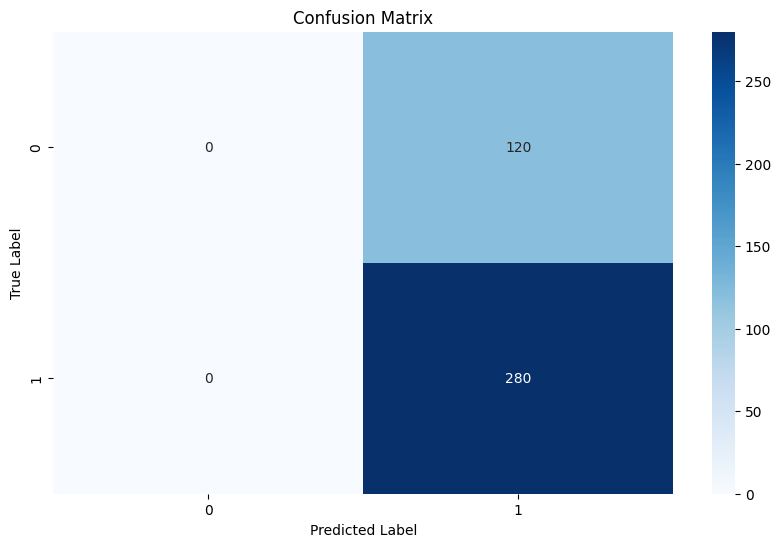

In [5]:
# Initialize the SVM classifier with a linear kernel
svm = SVC(kernel='linear', random_state=42)

# Train the model on the training data
svm.fit(X_train, y_train)

# Predict the labels for the test set
y_pred = svm.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Display the results
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

# Display the classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Display the confusion matrix
plt.figure(figsize=(10, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


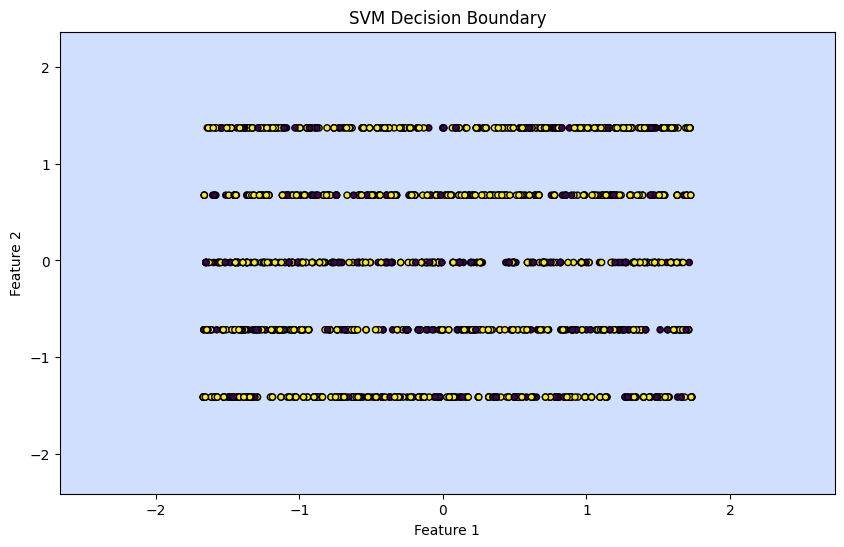

In [6]:
# This visualization is best done with 2 features, so we'll reduce the dataset for illustration
X_vis = X_train[:, :2]  # Use only the first two features

# Retrain SVM on the reduced dataset
svm_vis = SVC(kernel='linear', random_state=42)
svm_vis.fit(X_vis, y_train)

# Create a mesh grid for plotting
x_min, x_max = X_vis[:, 0].min() - 1, X_vis[:, 0].max() + 1
y_min, y_max = X_vis[:, 1].min() - 1, X_vis[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

# Predict on the mesh grid
Z = svm_vis.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.4, cmap='coolwarm')
plt.scatter(X_vis[:, 0], X_vis[:, 1], c=y_train, s=20, edgecolor='k')
plt.title('SVM Decision Boundary')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


In [ ]:
# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'degree': [2, 3, 4],  # Only relevant for 'poly' kernel
    'gamma': ['scale', 'auto']  # Only relevant for 'rbf' and 'poly' kernels
}

# Initialize GridSearchCV
grid_search = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy', verbose=2, n_jobs=-1)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Best parameters and score
print("Best parameters found: ", grid_search.best_params_)
print("Best accuracy: ", grid_search.best_score_)


Fitting 5 folds for each of 96 candidates, totalling 480 fits


In [ ]:
# Evaluate with the best parameters
best_svm = grid_search.best_estimator_
y_pred_best = best_svm.predict(X_test)

# Display the performance metrics again
print(f"Best SVM Accuracy: {accuracy_score(y_test, y_pred_best):.2f}")
print(f"Best SVM Precision: {precision_score(y_test, y_pred_best, average='weighted'):.2f}")
print(f"Best SVM Recall: {recall_score(y_test, y_pred_best, average='weighted'):.2f}")
print(f"Best SVM F1 Score: {f1_score(y_test, y_pred_best, average='weighted'):.2f}")
